You are given the data set.  

Using Python, perform the following:

**Goal (using only pandas):**
1. Pearson correlation (r)
2. Regression line plot
3. Optimal weights b0 (intercept) and b1 (slope)
4. Coefficient of determination (R²)
5. Final regression equation

Do not use any additional libraries, except pandas. 

In [12]:
import pandas as pd
data = {
    "age": [30, 40, 40, 20, 12, 31, 10],
    "body_size": [160, 160, 170, 50, 110, 160, 100]
}

df = pd.DataFrame(data)
df

,age,body_size
0,30,160
1,40,160
2,40,170
3,20,50
4,12,110
5,31,160
6,10,100


## Question 1 — Calculate Pearson correlation (r)

### Formula
\[
r = \frac{\sum (x - \bar{x})(y - \bar{y})}
{\sqrt{\sum (x - \bar{x})^2 \cdot \sum (y - \bar{y})^2}}
\]

### How the code works
- Compute mean values: \(\bar{x}\) and \(\bar{y}\)
- Compute numerator: sum of \((x-\bar{x})(y-\bar{y})\)
- Compute denominator: square root of product of sum of squares
- Divide numerator by denominator to get \(r\)

In [13]:
# Pearson Correlation (manual formula)

x_mean = df["age"].mean()
y_mean = df["body_size"].mean()

numerator = ((df["age"] - x_mean) * (df["body_size"] - y_mean)).sum()

denominator = (
    ((df["age"] - x_mean) ** 2).sum() *
    ((df["body_size"] - y_mean) ** 2).sum()
) ** 0.5

pearson_r = numerator / denominator
pearson_r


np.float64(0.7490530789257139)

## Question 2 — Draw the regression line

### Regression prediction formula
\[
\hat{y} = b_0 + b_1 x
\]

### How the code works
- First we compute \(b_0\) and \(b_1\) (next question)
- Then we calculate predicted values \(\hat{y}\) for each x
- Plot:
  - Scatter plot of real points (x, y)
  - Line plot of predicted points (x, \(\hat{y}\))

In [ ]:
# draw at end require b0 and b1

## Question 3 — Calculate optimal b0 and b1

### Formula for slope (b1)
\[
b_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}
\]

### Formula for intercept (b0)
\[
b_0 = \bar{y} - b_1 \bar{x}
\]

### How the code works
- We reuse the numerator: \(\sum (x-\bar{x})(y-\bar{y})\)
- Compute denominator for slope: \(\sum (x-\bar{x})^2\)
- Compute:
  - \(b_1 = \frac{numerator}{denominator}\)
  - \(b_0 = \bar{y} - b_1\bar{x}\)

In [10]:
# Calculate Regression Weights b₀ and b₁

x_mean = df["age"].mean()
y_mean = df["body_size"].mean()

num = ((df["age"] - x_mean) * (df["body_size"] - y_mean)).sum()
den = ((df["age"] - x_mean) ** 2).sum()

b1 = num / den
b0 = y_mean - b1 * x_mean

b0, b1


(np.float64(59.30964939497363), np.float64(2.7040024821594786))

In [7]:
# Regression Line Equation

# y_ = b0 + b1*x

## Question 4 — Calculate coefficient of determination (R²)

### Formula
\[
R^2 = r^2
\]

### How the code works
- Take the Pearson correlation value \(r\)
- Square it to get \(R^2\)
- Interpretation: percentage of variance in y explained by x


In [ ]:
R2 = pearson_r ** 2
R2


np.float64(0.5610805150480919)

## Question 5 — Provide the linear regression equation

### Formula
\[
\hat{y} = b_0 + b_1x
\]

### Final equation (plug in your b0 and b1)
\[
\hat{y} = 72.14 + 2.37x
\]

(Your exact numbers may differ slightly depending on rounding.)


<Axes: title={'center': 'Age vs Body Size with Regression Line'}, xlabel='age', ylabel='body_size'>

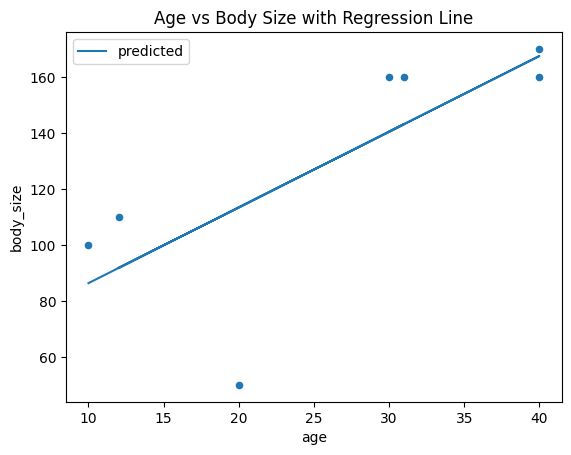

In [11]:
df["predicted"] = b0 + b1 * df["age"]

ax = df.plot(
    x="age",
    y="body_size",
    kind="scatter",
    title="Age vs Body Size with Regression Line"
)

df.plot(
    x="age",
    y="predicted",
    ax=ax
)
